# Task 1: Disease Prediction from Medical Data --> Liver disease prediction 

**Info about dataset**

Data source: https://www.kaggle.com/datasets/abhi8923shriv/liver-disease-patient-dataset/data

Feature number: 10

Dataset rows: 30691

**Features description:**

Age: Age of the patient

Gender: Gender of the patient

Total Bilirubin (TB): Total bilirubin level in the blood

Direct Bilirubin (DB): Direct bilirubin level in the blood

Alkaline Phosphotase (Alkphos): Alkaline phosphatase enzyme level in the blood

Alamine Aminotransferase (SGPT): Alamine aminotransferase (also known as serum glutamate-pyruvate transaminase) level in the blood

Aspartate Aminotransferase (SGOT): Aspartate aminotransferase (also known as serum glutamic-oxaloacetic transaminase) level in the blood

Total Proteins (TP): Total protein level in the blood

Albumin (ALB): Albumin level in the blood

Albumin and Globulin Ratio (A/G Ratio): Ratio of albumin to globulin in the blood

**Target:**

Result: 1 --> for liver patients and 2 --> for non-liver patients

# _______________________________________________________________

**1. Data Exploration**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve, roc_curve, auc

In [2]:
df = pd.read_csv('train_data.csv', encoding='latin1')

In [3]:
df.shape

(30691, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    30689 non-null  float64
 1   Gender of the patient                 29789 non-null  object 
 2   Total Bilirubin                       30043 non-null  float64
 3   Direct Bilirubin                      30130 non-null  float64
 4    Alkphos Alkaline Phosphotase         29895 non-null  float64
 5    Sgpt Alamine Aminotransferase        30153 non-null  float64
 6   Sgot Aspartate Aminotransferase       30229 non-null  float64
 7   Total Protiens                        30228 non-null  float64
 8    ALB Albumin                          30197 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  30132 non-null  float64
 10  Result                                30691 non-null  int64  
dtypes: float64(9), 

In [5]:
# Noticed spaces before some feature's names so remove it 
df.rename(columns=lambda x: x.strip() if isinstance(x, str) else x, inplace=True)

In [6]:
# check names after removing spaces
df.columns

Index(['Age of the patient', 'Gender of the patient', 'Total Bilirubin',
       'Direct Bilirubin', 'Alkphos Alkaline Phosphotase',
       'Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase',
       'Total Protiens', 'ALB Albumin', 'A/G Ratio Albumin and Globulin Ratio',
       'Result'],
      dtype='object')

In [7]:
df.describe()

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
count,30689.000000,30043.000000,30130.000000,29895.000000,30153.000000,30229.000000,30228.000000,30197.000000,30132.000000,30691.000000
mean,44.107205,3.370319,1.528042,289.075364,81.488641,111.469979,6.480237,3.130142,0.943467,1.285882
std,15.981043,6.255522,2.869592,238.537589,182.158850,280.851078,1.081980,0.792281,0.323164,0.451841
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,32.000000,0.800000,0.200000,175.000000,23.000000,26.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,209.000000,35.000000,42.000000,6.600000,3.100000,0.900000,1.000000
75%,55.000000,2.700000,1.300000,298.000000,62.000000,88.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [8]:
# Check the missing values
df.isna().sum()

Age of the patient                        2
Gender of the patient                   902
Total Bilirubin                         648
Direct Bilirubin                        561
Alkphos Alkaline Phosphotase            796
Sgpt Alamine Aminotransferase           538
Sgot Aspartate Aminotransferase         462
Total Protiens                          463
ALB Albumin                             494
A/G Ratio Albumin and Globulin Ratio    559
Result                                    0
dtype: int64

**More about the target**

In [9]:
df['Result'].unique()

array([1, 2], dtype=int64)

In [10]:
# Convert 'Result' Taret column to object type and name the categories to Liver Patient & Non-Liver Patient
df['Result'] = df['Result'].astype('object')

# Mapping dictionary
mapping = {1: 'Liver Patient', 2: 'Non-Liver Patient'}
df['Result'] = df['Result'].map(mapping)

In [11]:
df['Result'].head()

0    Liver Patient
1    Liver Patient
2    Liver Patient
3    Liver Patient
4    Liver Patient
Name: Result, dtype: object

In [12]:
df['Result'].value_counts()

Liver Patient        21917
Non-Liver Patient     8774
Name: Result, dtype: int64

<Axes: xlabel='Result', ylabel='count'>

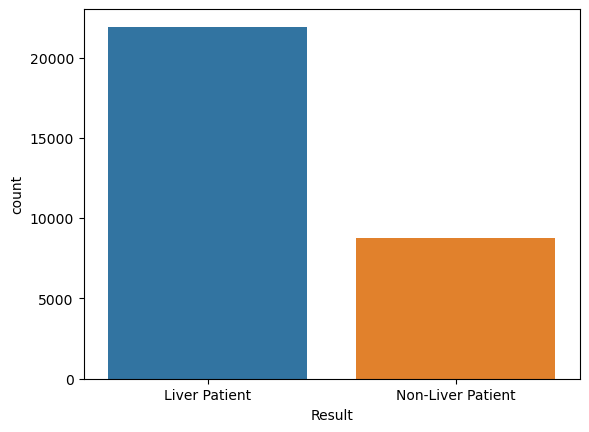

In [13]:
# Plot the frequency of target values
sns.countplot(data=df, x='Result')


**2. Preprocessing: Remove missing values**

In [14]:
# Using KNNImputer to fill missing data
# 1. Numeric Data
imputer = KNNImputer(n_neighbors=5)
df['Age of the patient'] = imputer.fit_transform(df[['Age of the patient']])
df['Total Bilirubin'] = imputer.fit_transform(df[['Total Bilirubin']])
df['Direct Bilirubin'] = imputer.fit_transform(df[['Direct Bilirubin']])
df['Alkphos Alkaline Phosphotase'] = imputer.fit_transform(df[['Alkphos Alkaline Phosphotase']])
df['Sgpt Alamine Aminotransferase'] = imputer.fit_transform(df[['Sgpt Alamine Aminotransferase']])
df['Sgot Aspartate Aminotransferase'] = imputer.fit_transform(df[['Sgot Aspartate Aminotransferase']])
df['Total Protiens'] = imputer.fit_transform(df[['Total Protiens']])
df['ALB Albumin'] = imputer.fit_transform(df[['ALB Albumin']])
df['A/G Ratio Albumin and Globulin Ratio'] = imputer.fit_transform(df[['A/G Ratio Albumin and Globulin Ratio']])

In [15]:
# Check the missing values
df.isna().sum()

Age of the patient                        0
Gender of the patient                   902
Total Bilirubin                           0
Direct Bilirubin                          0
Alkphos Alkaline Phosphotase              0
Sgpt Alamine Aminotransferase             0
Sgot Aspartate Aminotransferase           0
Total Protiens                            0
ALB Albumin                               0
A/G Ratio Albumin and Globulin Ratio      0
Result                                    0
dtype: int64

In [16]:
# to fill missing in gender make  make label encoding first
label_encoder = LabelEncoder()
df['Gender of the patient'] = label_encoder.fit_transform(df['Gender of the patient'].astype(str))

In [17]:
#2. categorical Data using also KNNImputer
df['Gender of the patient'] = imputer.fit_transform(df[['Gender of the patient']])


In [18]:
df.isna().sum()

Age of the patient                      0
Gender of the patient                   0
Total Bilirubin                         0
Direct Bilirubin                        0
Alkphos Alkaline Phosphotase            0
Sgpt Alamine Aminotransferase           0
Sgot Aspartate Aminotransferase         0
Total Protiens                          0
ALB Albumin                             0
A/G Ratio Albumin and Globulin Ratio    0
Result                                  0
dtype: int64

In [19]:
df

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,0.0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,Liver Patient
1,62.0,1.0,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,Liver Patient
2,62.0,1.0,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,Liver Patient
3,58.0,1.0,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,Liver Patient
4,72.0,1.0,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,Liver Patient
...,...,...,...,...,...,...,...,...,...,...,...
30686,50.0,1.0,2.2,1.0,610.0,17.0,28.0,7.3,2.6,0.55,Liver Patient
30687,55.0,1.0,2.9,1.3,482.0,22.0,34.0,7.0,2.4,0.50,Liver Patient
30688,54.0,1.0,6.8,3.0,542.0,116.0,66.0,6.4,3.1,0.90,Liver Patient
30689,48.0,0.0,1.9,1.0,231.0,16.0,55.0,4.3,1.6,0.60,Liver Patient


# _______________________________________________________________

**3. Feature Selection**

In [20]:
# make label encoding to the target column 'Result'
label_encoder = LabelEncoder()
df['Result'] = label_encoder.fit_transform(df['Result'].astype(str))

In [21]:
# Compute correlation coefficients
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['Result'].abs().sort_values(ascending=False)

print("Correlation with target variable:")
print(correlation_with_target)


Correlation with target variable:
Result                                  1.000000
Direct Bilirubin                        0.247078
Total Bilirubin                         0.222448
Alkphos Alkaline Phosphotase            0.180928
Sgpt Alamine Aminotransferase           0.164298
ALB Albumin                             0.159068
Sgot Aspartate Aminotransferase         0.157445
A/G Ratio Albumin and Globulin Ratio    0.156742
Total Protiens                          0.030140
Age of the patient                      0.004759
Gender of the patient                   0.000429
Name: Result, dtype: float64


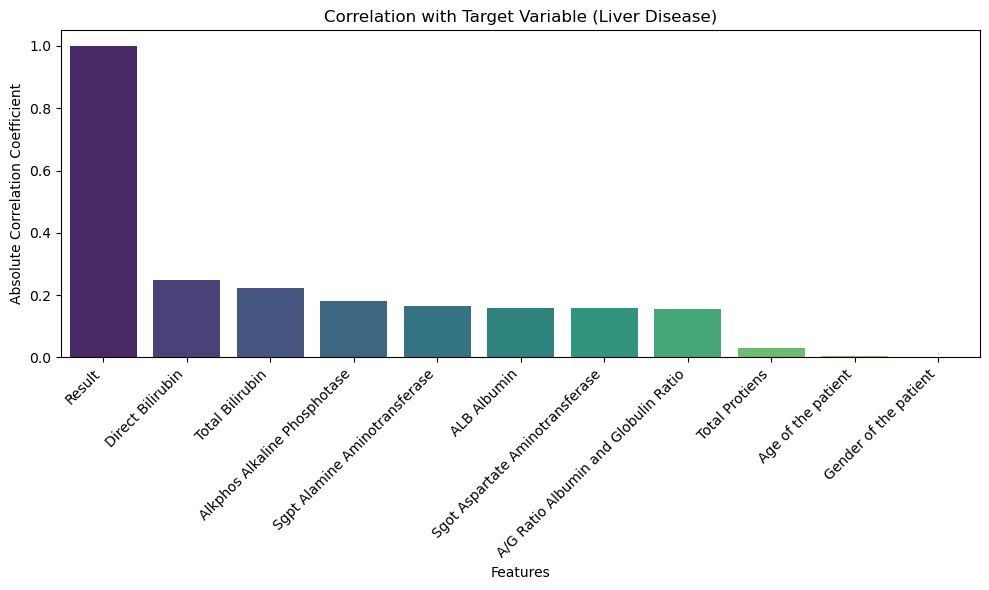

In [22]:
# Plot the correlation coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette='viridis')
plt.title('Correlation with Target Variable (Liver Disease)')
plt.xlabel('Features')
plt.ylabel('Absolute Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Top features based on feature importances: Index(['Alkphos Alkaline Phosphotase', 'Sgpt Alamine Aminotransferase',
       'Sgot Aspartate Aminotransferase', 'Total Bilirubin', 'Total Protiens',
       'ALB Albumin', 'A/G Ratio Albumin and Globulin Ratio',
       'Direct Bilirubin', 'Age of the patient', 'Gender of the patient'],
      dtype='object')


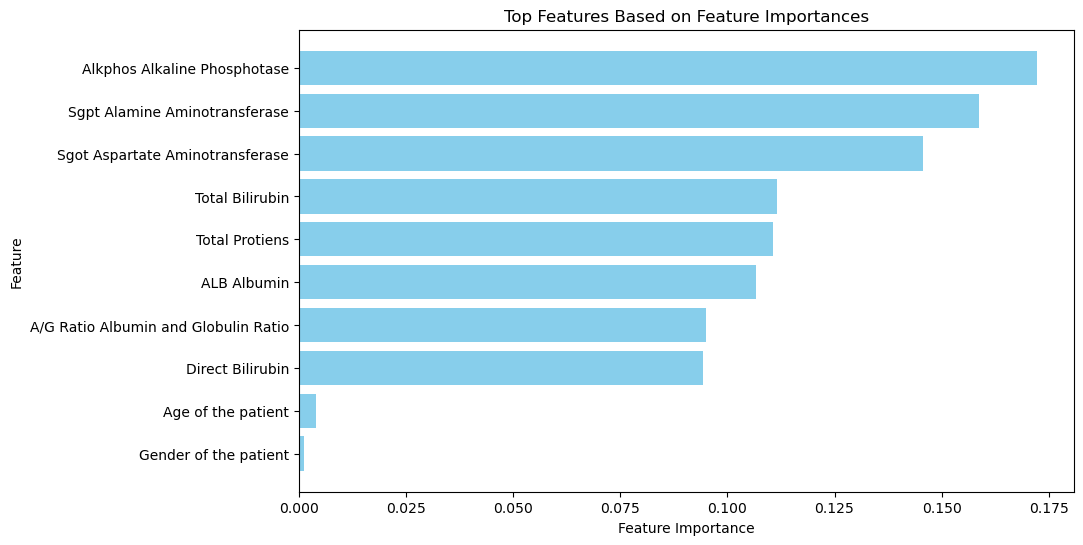

In [23]:
X = df.drop('Result', axis=1)  
y = df['Result']

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Sort features based on importances
sorted_indices = feature_importances.argsort()[::-1]

top_features = X.columns[sorted_indices]

print("Top features based on feature importances:", top_features)
plt.figure(figsize=(10, 6))
plt.barh(top_features[:10], feature_importances[sorted_indices][:10], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top Features Based on Feature Importances')
plt.gca().invert_yaxis()  
plt.show()

**4. Model Training: 4.1. RandomForest , 4.2. xgboost**

**4.1. RandomForest**

In [24]:
# Split train data to fearures and target
X = df.drop(['Result','Age of the patient','Gender of the patient'], axis=1)  
y = df['Result']

In [25]:
# The features and target alreadly label encoded
X

,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio
0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90
1,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74
2,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89
3,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00
4,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...
30686,2.2,1.0,610.0,17.0,28.0,7.3,2.6,0.55
30687,2.9,1.3,482.0,22.0,34.0,7.0,2.4,0.50
30688,6.8,3.0,542.0,116.0,66.0,6.4,3.1,0.90
30689,1.9,1.0,231.0,16.0,55.0,4.3,1.6,0.60


In [26]:
y

0        0
1        0
2        0
3        0
4        0
        ..
30686    0
30687    0
30688    0
30689    0
30690    0
Name: Result, Length: 30691, dtype: int32

In [27]:
# Split train data to train and validation
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.3, random_state=42,shuffle=True)

# Split the validation set again into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42,shuffle=True)


In [28]:
# Random Forest Classifier 

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
}

rf_classifier = RandomForestClassifier(class_weight='balanced')

# Create GridSearchCV 
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)


Best Parameters: {'n_estimators': 300}


**Model Evaluation: A. val set , B. test set**

In [29]:
# Make predictions on the validation part
y_pred = best_estimator.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)

print("Validation Classification Report:")
print(classification_report(y_val, y_pred))


Validation Accuracy: 0.9969591659426585
Validation Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3277
           1       1.00      0.99      0.99      1327

    accuracy                           1.00      4604
   macro avg       1.00      0.99      1.00      4604
weighted avg       1.00      1.00      1.00      4604



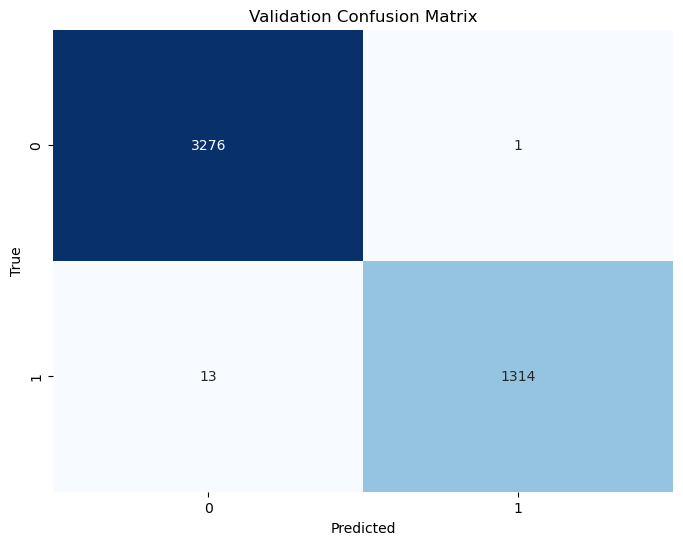

In [30]:
# Get confusion matrix for val set
conf_matrix = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Validation Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

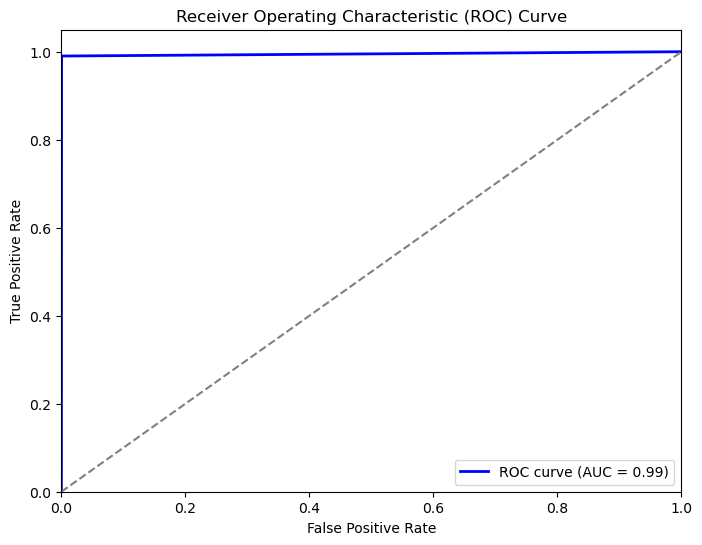

In [31]:
from sklearn.metrics import roc_curve, auc

# Get false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [32]:
# Now, evaluate the model on the test set
y_test_pred = best_estimator.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
print("\nTest Accuracy:", test_accuracy)

print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))


Test Accuracy: 0.9976107732406603
Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3350
           1       1.00      0.99      1.00      1254

    accuracy                           1.00      4604
   macro avg       1.00      1.00      1.00      4604
weighted avg       1.00      1.00      1.00      4604



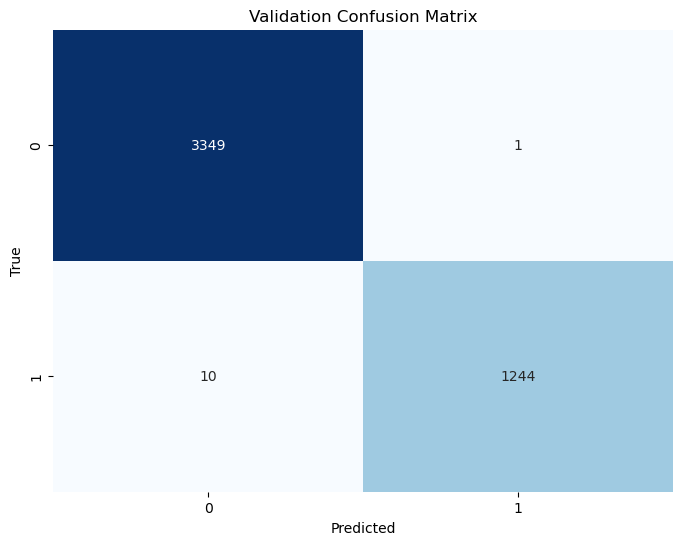

In [33]:
# Get confusion matrix for test set

conf_matrix = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Validation Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

**4.2. xgboost**

In [44]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 1.4 MB/s eta 0:01:14
   ---------------------------------------- 0.1/99.8 MB 1.2 MB/s eta 0:01:23
   ---------------------------------------- 0.2/99.8 MB 1.6 MB/s eta 0:01:04
   ---------------------------------------- 0.2/99.8 MB 1.6 MB/s eta 0:01:04
   ---------------------------------------- 0.3/99.8 MB 1.3 MB/s eta 0:01:16
   ---------------------------------------- 0.4/99.8 MB 1.3 MB/s eta 0:01:18
   ---------------------------------------- 0.5/99.8 MB 1.4 MB/s eta 0:01:13
   ---------------------------------------- 0.6/99.8 MB 1.5 MB/s eta 0:01:07
   ---------------------------------------- 0.7/99.8 MB 1.6 MB/s eta 0:01:03
   -----------------------------

In [45]:
import xgboost as xgb

model = xgb.XGBClassifier()

model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

**Model Evaluation: A. val set , B. test set**

In [46]:
# Make predictions on the validation part
y_pred = model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)

print("Validation Classification Report:")
print(classification_report(y_val, y_pred))

Validation Accuracy: 0.9980451781059948
Validation Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3277
           1       1.00      0.99      1.00      1327

    accuracy                           1.00      4604
   macro avg       1.00      1.00      1.00      4604
weighted avg       1.00      1.00      1.00      4604



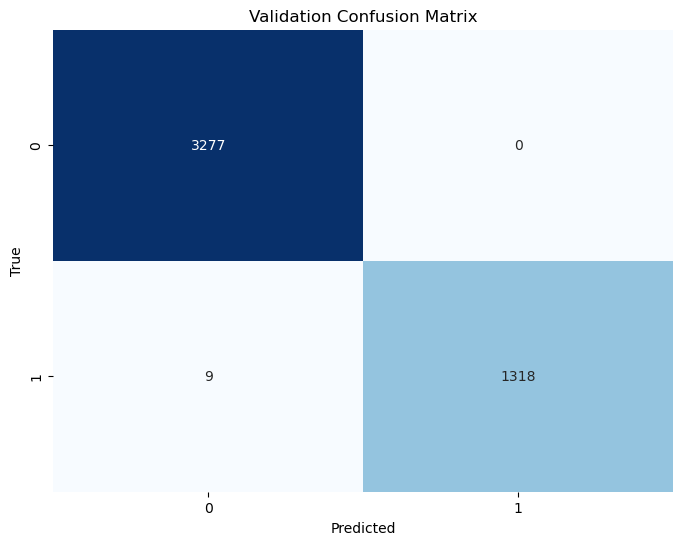

In [47]:
# Get confusion matrix for val set
conf_matrix = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Validation Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

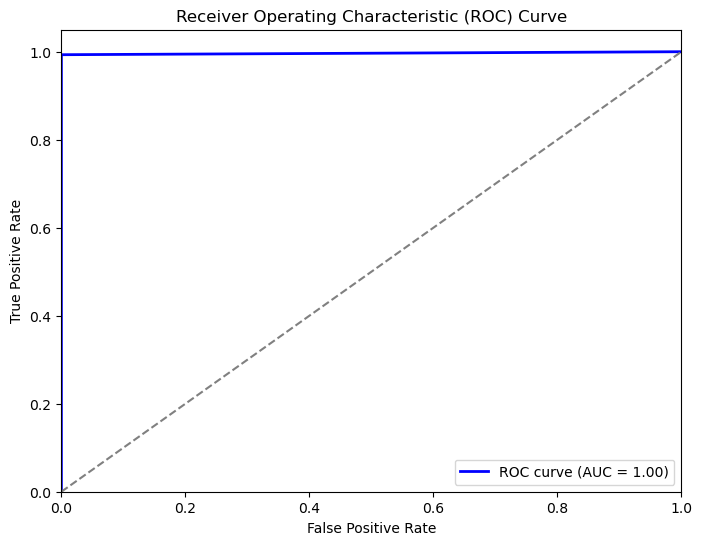

In [48]:
from sklearn.metrics import roc_curve, auc

# Get false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [49]:
# Now, evaluate the model on the test set
y_test_pred = model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
print("\nTest Accuracy:", test_accuracy)

print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))


Test Accuracy: 0.998262380538662
Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3350
           1       1.00      1.00      1.00      1254

    accuracy                           1.00      4604
   macro avg       1.00      1.00      1.00      4604
weighted avg       1.00      1.00      1.00      4604



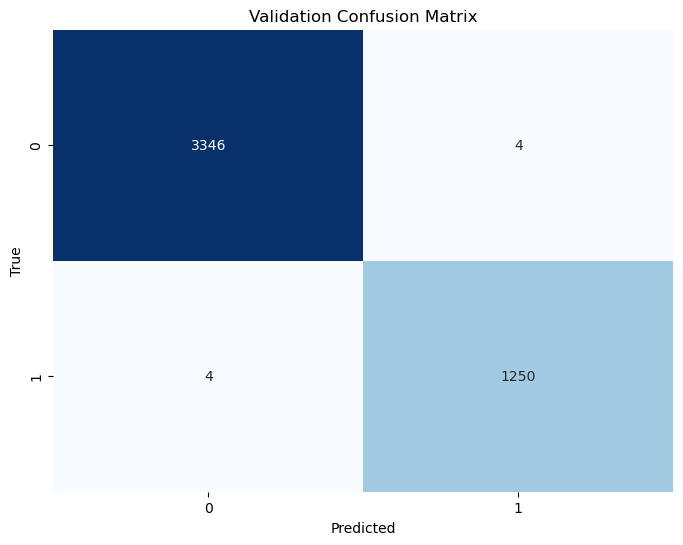

In [50]:
# Get confusion matrix for test set

conf_matrix = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Validation Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [52]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train, y_train, cv=5)

print("Cross Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross Validation Scores: [0.99650919 0.99627647 0.99790552 0.9972067  0.99790503]
Mean CV Score: 0.9971605823473049
